In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
import random
%matplotlib inline

import check_test
from plot_utils import plot_values

In [2]:
env = gym.make('CliffWalking-v0')

In [3]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


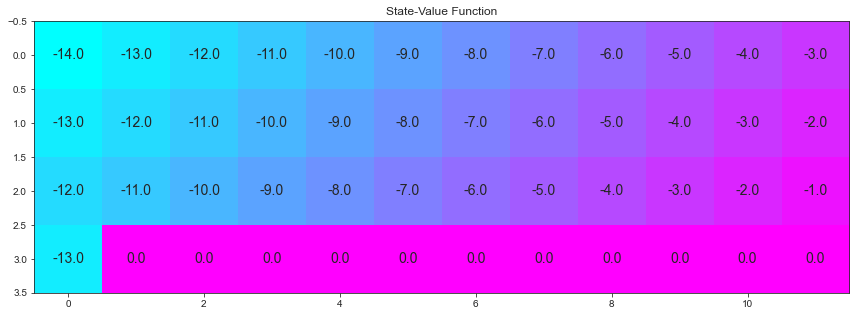

In [4]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

In [5]:
def update_Q (alpha, gamma, Q, state, action, reward, next_state=None, next_action=None):
    current = Q[state][action]
    Qsa_next = Q[next_state][next_action] if next_state is not None else 0
    target = reward + (gamma * Qsa_next)
    new_value = current + (alpha * (target - current))
    return new_value

def epsilon_Greedy(Q, state, nA, eps):
    if random.random() > eps :
        return np.argmax(Q[state])
    else :
        return random.choice(np.arange(nA))

In [8]:
def sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    tmp_scores = deque(maxlen=plot_every)
    avg_scores = deque(maxlen=num_episodes)
    
    for ep in range(1, num_episodes+1):
        if ep % 100 == 0:
            print("\rEpisode {}/{}".format(ep, num_episodes), end="")
            sys.stdout.flush()   
        score = 0                                             
        state = env.reset()
        eps = 1 / ep
        action = epsilon_Greedy(Q, state, nA, eps)
        
        while True:
            next_state, reward, done, info = env.step(action)
            score += reward
            if not done:
                next_action = epsilon_Greedy(Q, next_state, nA, eps)
                Q[state][action] = update_Q(alpha, gamma, Q, state, action, reward, next_state, next_action)
                state=next_state
                action=next_action
            if done:
                Q[state][action] = update_Q(alpha, gamma, Q, state, action, reward)
                tmp_scores.append(score)
                break;
                
        if (ep % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
    
    
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
 
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    
    return Q

Episode 5000/5000

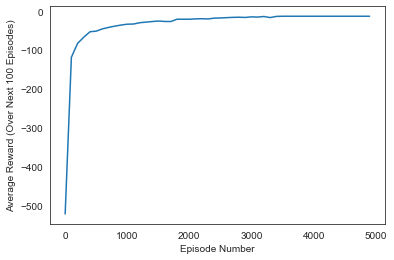

Best Average Reward over 100 Episodes:  -13.0
defaultdict(<function sarsa.<locals>.<lambda> at 0x000002826D612DC8>, {36: array([-13.00005371, -98.45615914, -18.23086969, -16.66715021]), 24: array([-12.05051027, -12.00002201, -12.0631046 , -12.04951078]), 12: array([-11.31795645, -11.31985532, -11.31755558, -11.3181632 ]), 25: array([-11.12115887, -11.00000825, -50.8368985 , -11.13754314]), 0: array([-10.87219517, -10.87670015, -10.8735763 , -10.88742483]), 13: array([-10.66562041, -10.66263014, -10.67611712, -10.66339956]), 1: array([-10.41554867, -10.40086962, -10.39735648, -10.39898973]), 14: array([-9.88911821, -9.88642878, -9.89463364, -9.88788483]), 15: array([-9.08285027, -9.07376576, -9.07547174, -9.08644404]), 16: array([-8.23970663, -8.24109364, -8.24640553, -8.24742543]), 4: array([-8.30275834, -8.29035585, -8.29976957, -8.29932339]), 5: array([-7.52102444, -7.51181379, -7.5159832 , -7.52948058]), 6: array([-6.73467365, -6.72008123, -6.72516751, -6.72320109]), 18: array([-6.5

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  2  3  1  1  1  1  2  2  0  2  2]
 [ 2  1  1  1  0  1  0  2  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


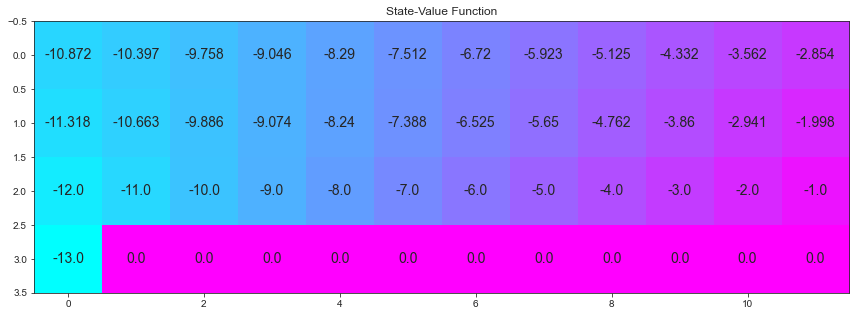

In [10]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 5000, .01)
print(Q_sarsa)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

In [13]:
def update_Q_sarsamax (alpha, gamma, Q, state, action, reward, next_state=None):
    current = Q[state][action]
    Qsa_next = np.max(Q[next_state]) if next_state is not None else 0
    target = reward + (gamma * Qsa_next)
    new_value = current + (alpha * (target - current))
    return new_value

In [16]:
def q_learning(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    tmp_scores = deque(maxlen=plot_every)
    avg_scores = deque(maxlen=num_episodes)
    
    for ep in range(1, num_episodes+1):
        if ep % 100 == 0:
            print("\rEpisode {}/{}".format(ep, num_episodes), end="")
            sys.stdout.flush()   
        score = 0                                             
        state = env.reset()
        eps = 1 / ep

        while True:
            action = epsilon_Greedy(Q, state, nA, eps)
            next_state, reward, done, info = env.step(action)
            score += reward
            Q[state][action] = update_Q_sarsamax(alpha, gamma, Q, state, action, reward, next_state)
            state = next_state
            if done:
                tmp_scores.append(score)
                break;
                
        if (ep % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
    
    
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
 
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    
    return Q

Episode 5000/5000

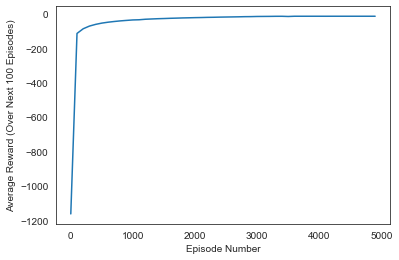

Best Average Reward over 100 Episodes:  -13.0


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 0  2  3  1  2  1  1  1  1  1  2  0]
 [ 1  1  3  1  2  1  2  3  1  1  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


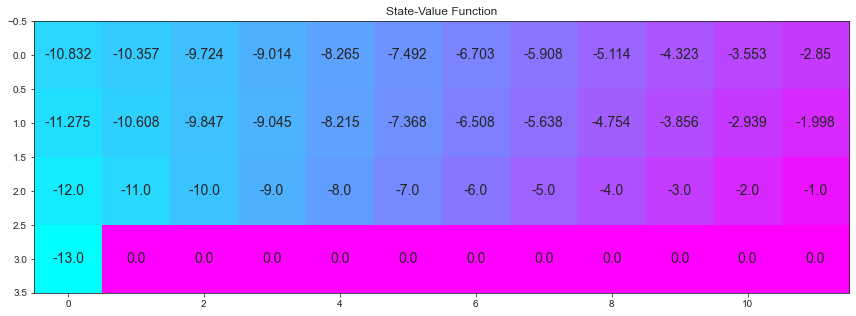

In [17]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

In [29]:
def update_Q_expectedSarsa (alpha, gamma, nA, eps, Q, state, action, reward, next_state=None):
    current = Q[state][action]
    policy_s = np.ones(nA) * eps/nA
    policy_s[np.argmax(Q[next_state])] = 1 - eps + (eps/nA)
    Qsa_next = np.dot(Q[next_state], policy_s)
    target = reward + (gamma * Qsa_next)
    new_value = current + (alpha * (target - current))
    return new_value

In [32]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    tmp_scores = deque(maxlen=plot_every)
    avg_scores = deque(maxlen=num_episodes)
    
    for ep in range(1, num_episodes+1):
        if ep % 100 == 0:
            print("\rEpisode {}/{}".format(ep, num_episodes), end="")
            sys.stdout.flush()   
        score = 0                                             
        state = env.reset()
        eps = 0.005

        while True:
            action = epsilon_Greedy(Q, state, nA, eps)
            next_state, reward, done, info = env.step(action)
            score += reward
            Q[state][action] = update_Q_expectedSarsa(alpha, gamma, nA, eps, Q, state, action, reward, next_state)
            state = next_state
            if done:
                tmp_scores.append(score)
                break;
                
        if (ep % plot_every == 0):
            avg_scores.append(np.mean(tmp_scores))
    
    
    plt.plot(np.linspace(0,num_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % plot_every)
    plt.show()
 
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    
    return Q

Episode 5000/5000

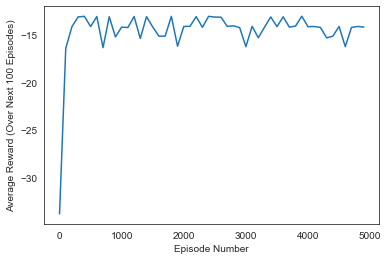

Best Average Reward over 100 Episodes:  -13.01


**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  2  1  1  1  1  0  0  1  2  1  2]
 [ 3  1  1  1  1  1  1  1  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


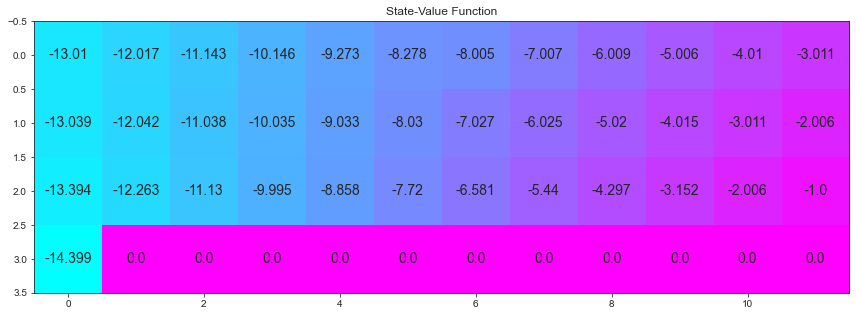

In [33]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 5000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])